<a href="https://colab.research.google.com/github/vidhirana10/Sales_data_forecasting/blob/main/EDA_Sales_data_forecasting_intellimark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA for the sales forecasting data**









## Data loading




In [ ]:
import pandas as pd

df = pd.read_csv('Assessment-2-Associate-DS(in).csv')
display(df.head())
print(df.shape)

,weekend_date,channel,brand,category,sub_category,SerailNum,quantity
0,4/6/2022,Channel1,B1,Body,Body Lotion,1,56
1,11/6/2022,Channel1,B1,Body,Body Lotion,1,122
2,18/06/2022,Channel1,B1,Body,Body Lotion,1,102
3,25/06/2022,Channel1,B1,Body,Body Lotion,1,128
4,2/7/2022,Channel1,B1,Body,Body Lotion,1,97


(600, 7)


# Data exploration and cleaning

In [ ]:
df.dtypes

,0
weekend_date,object
channel,object
brand,object
category,object
sub_category,object
SerailNum,int64
quantity,int64


In [ ]:
# To check NULL/missing values
print(df.isnull().sum())

weekend_date    0
channel         0
brand           0
category        0
sub_category    0
SerailNum       0
quantity        0
dtype: int64


## Fixing datatype for weekend_date

In [ ]:
#To check if any mixed formats in dates
print(df.iloc[22:25]['weekend_date'])
print(df.iloc[100:105]['weekend_date'])
print(df.iloc[200:205]['weekend_date'])

22     5/11/2022
23    12/11/2022
24    19/11/2022
Name: weekend_date, dtype: object
100      4/5/2024
101     11/5/2024
102    18/05/2024
103    25/05/2024
104      1/6/2024
Name: weekend_date, dtype: object
200       9/3/2024 0:00
201    16/03/2024 00:00
202    23/03/2024 00:00
203    30/03/2024 00:00
204       6/4/2024 0:00
Name: weekend_date, dtype: object


Since dates are in mixed formats ,cannot directly be converted to datetime format

In [ ]:
# To check if any mixed formats in dates and strip 0:00
def strip_time(date_string):
    if isinstance(date_string, str) and '0:00' in date_string:
      return date_string.split(' ')[0]
    return date_string

df['weekend_date'] = df['weekend_date'].apply(strip_time)

print(df.iloc[300:305]['weekend_date'])
print(df.iloc[100:105]['weekend_date'])
print(df.iloc[200:205]['weekend_date'])


300    25/02/2023
301      4/3/2023
302      4/3/2023
303      4/3/2023
304     11/3/2023
Name: weekend_date, dtype: object
100      4/5/2024
101     11/5/2024
102    18/05/2024
103    25/05/2024
104      1/6/2024
Name: weekend_date, dtype: object
200      9/3/2024
201    16/03/2024
202    23/03/2024
203    30/03/2024
204      6/4/2024
Name: weekend_date, dtype: object


In [ ]:
df['weekend_date'] = pd.to_datetime(df['weekend_date'], format='%d/%m/%Y', errors='raise')


In [ ]:
df.dtypes

,0
weekend_date,datetime64[ns]
channel,object
brand,object
category,object
sub_category,object
SerailNum,int64
quantity,int64


In [ ]:
# Create 'month_year' column
df['month_year'] = df['weekend_date'].dt.to_period('M')

# Date range
date_min = df['weekend_date'].min()
date_max = df['weekend_date'].max()
print(f"Date range: {date_min.date()} to {date_max.date()}")

# Number of months of data
num_months = len(df['month_year'].unique())
print(f"Number of months of data: {num_months}")


Date range: 2022-05-28 to 2024-08-31
Number of months of data: 28


In [ ]:
# Number of unique channels and their names
unique_channels = df['channel'].unique()
num_unique_channels = len(unique_channels)
print(f"Number of unique channels: {num_unique_channels}")
print(f"Unique channel names: {unique_channels}")

# Number of unique brands and their names
unique_brands = df['brand'].unique()
num_unique_brands = len(unique_brands)
print(f"\nNumber of unique brands: {num_unique_brands}")
print(f"Unique brand names: {unique_brands}")

# Number of unique categories and their names
unique_categories = df['category'].unique()
num_unique_categories = len(unique_categories)
print(f"\nNumber of unique categories: {num_unique_categories}")
print(f"Unique category names: {unique_categories}")

# Number of unique sub-categories and their names
unique_sub_categories = df['sub_category'].unique()
num_unique_sub_categories = len(unique_sub_categories)
print(f"\nNumber of unique sub-categories: {num_unique_sub_categories}")
print(f"Unique sub-category names: {unique_sub_categories}")

Number of unique channels: 3
Unique channel names: ['Channel1' 'Channel3' 'Channel2']

Number of unique brands: 2
Unique brand names: ['B1' 'B2']

Number of unique categories: 3
Unique category names: ['Body' 'Face' 'Cat1']

Number of unique sub-categories: 4
Unique sub-category names: ['Body Lotion' 'Face Serum' 'Sub-Cat1' 'Face Cleanser']


In [ ]:
df['SerailNum'].unique()

array([1, 3, 5, 2, 4])

## Outlier detection and management for quantities sold

count     600.000000
mean      547.330000
std       925.749108
min         1.000000
25%       121.000000
50%       244.500000
75%       624.500000
max      8051.000000
Name: quantity, dtype: float64


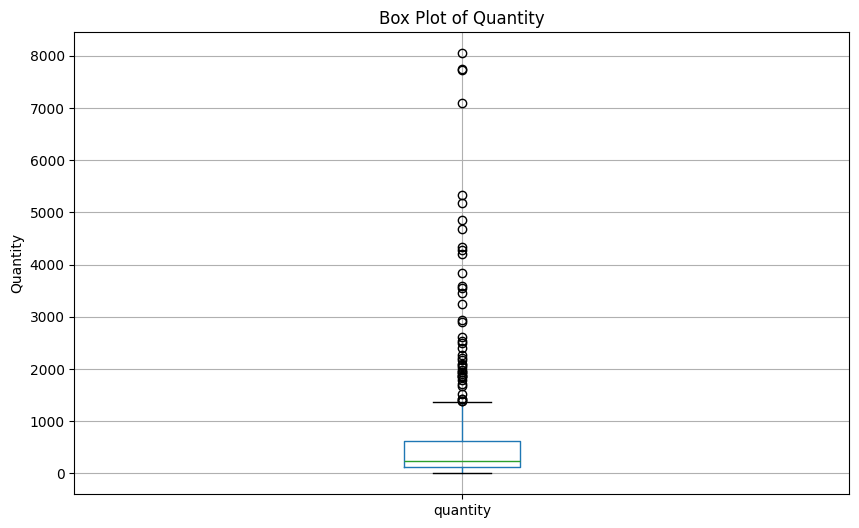

In [ ]:
import matplotlib.pyplot as plt

print(df['quantity'].describe())
plt.figure(figsize=(10, 6))
df.boxplot(column=['quantity'])
plt.title('Box Plot of Quantity')
plt.ylabel('Quantity')
plt.show()

In [ ]:
# Calculate the first quartile (Q1) and third quartile (Q3) for the 'quantity' column
Q1 = df['quantity'].quantile(0.20)
Q3 = df['quantity'].quantile(0.80)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['quantity'] < lower_bound) | (df['quantity'] > upper_bound)]

# Calculate the number of outlier rows and the total number of rows
num_outliers = len(outliers)
total_rows = len(df)

# Print the number of outliers and the proportion of outliers
print(f"Number of outliers: {num_outliers}")
print(f"Proportion of outliers: {num_outliers / total_rows:.2%}")


# Cap the outliers
#df['quantity'] = df['quantity'].clip(lower=lower_bound, upper=upper_bound)


Number of outliers: 36
Proportion of outliers: 6.00%


In [ ]:
df[df['quantity']==8051] #check

,weekend_date,channel,brand,category,sub_category,SerailNum,quantity,month_year
512,2024-03-16,Channel2,B2,Face,Face Cleanser,4,8051,2024-03


# Visualisation for analysisng trends and patterns


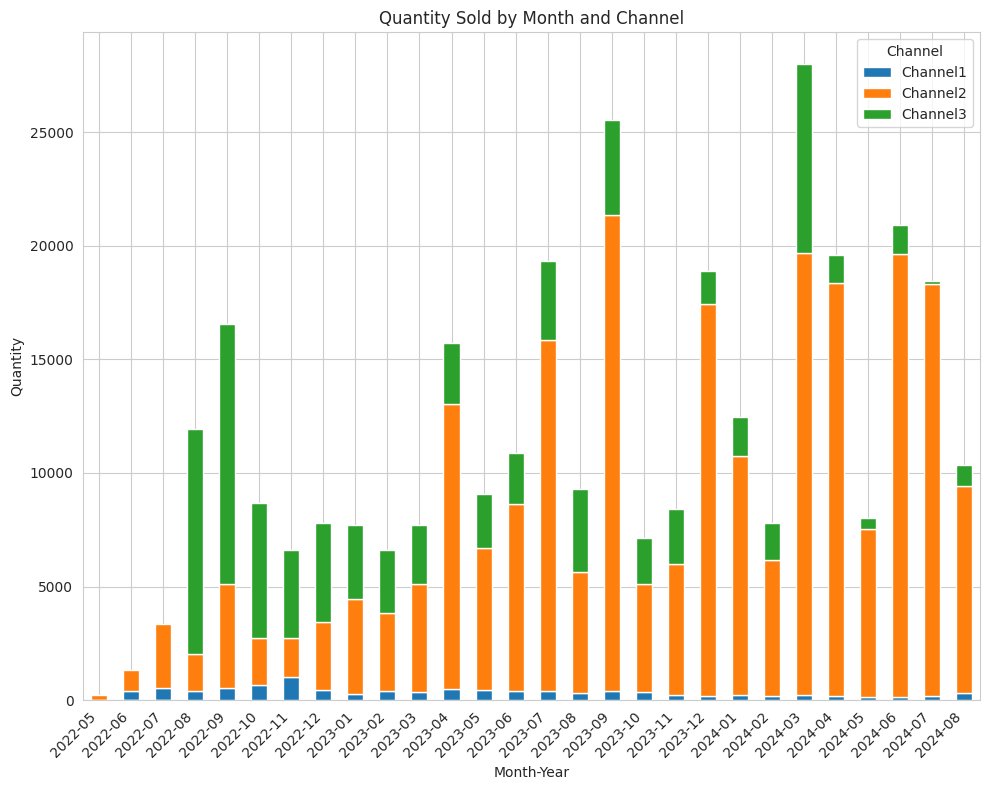


The month with the highest total quantity sold is: 2024-03


In [ ]:
import matplotlib.pyplot as plt

# Group data by month_year and channel, then sum the quantity
grouped_data = df.groupby(['month_year', 'channel'])['quantity'].sum().unstack()

# Plot the stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Quantity Sold by Month and Channel')
plt.xlabel('Month-Year')
plt.ylabel('Quantity')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Channel')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Find the month with the highest total quantity sold
total_quantity_by_month = df.groupby('month_year')['quantity'].sum()
best_month = total_quantity_by_month.idxmax()
print(f"\nThe month with the highest total quantity sold is: {best_month}")


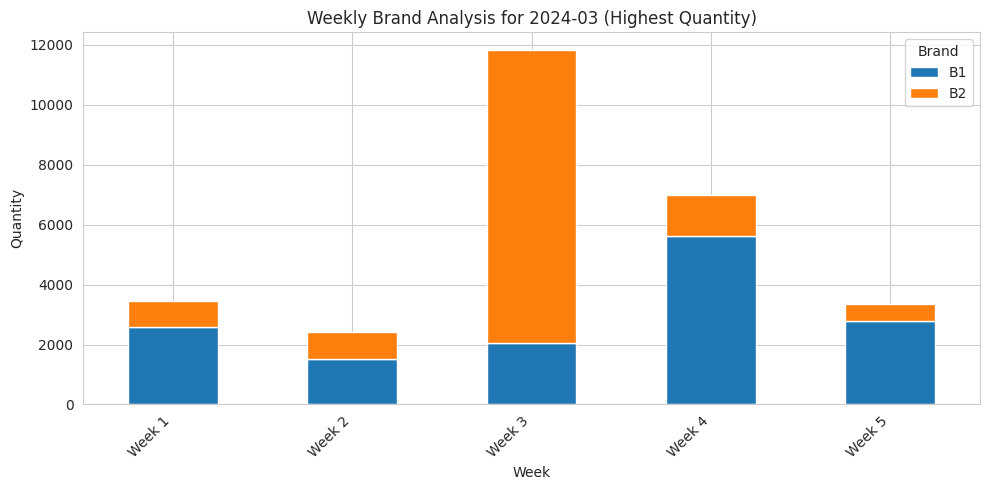

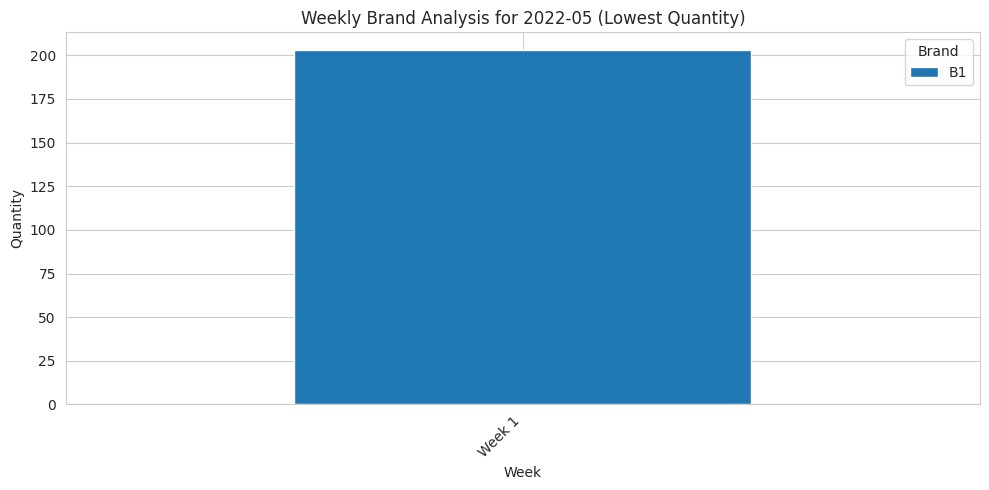

In [ ]:
# Find the month with the highest and lowest total quantity sold
total_quantity_by_month = df.groupby('month_year')['quantity'].sum()
best_month = total_quantity_by_month.idxmax()
worst_month = total_quantity_by_month.idxmin()

# Filter data for the best and worst months
best_month_data = df[df['month_year'] == best_month]
worst_month_data = df[df['month_year'] == worst_month]

# Function to create weekly stacked bar plot
def plot_weekly_brand_analysis(data, title):
    weekly_data = data.groupby([pd.Grouper(key='weekend_date', freq='W'), 'brand'])['quantity'].sum().unstack()
    weekly_data.index = [f'Week {i+1}' for i in range(len(weekly_data))] #Rename index to week numbers
    weekly_data.plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.title(title)
    plt.xlabel('Week')
    plt.ylabel('Quantity')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Brand')
    plt.tight_layout()
    plt.show()

# Plot for the best month
plot_weekly_brand_analysis(best_month_data, f'Weekly Brand Analysis for {best_month} (Highest Quantity)')

# Plot for the worst month
plot_weekly_brand_analysis(worst_month_data, f'Weekly Brand Analysis for {worst_month} (Lowest Quantity)')


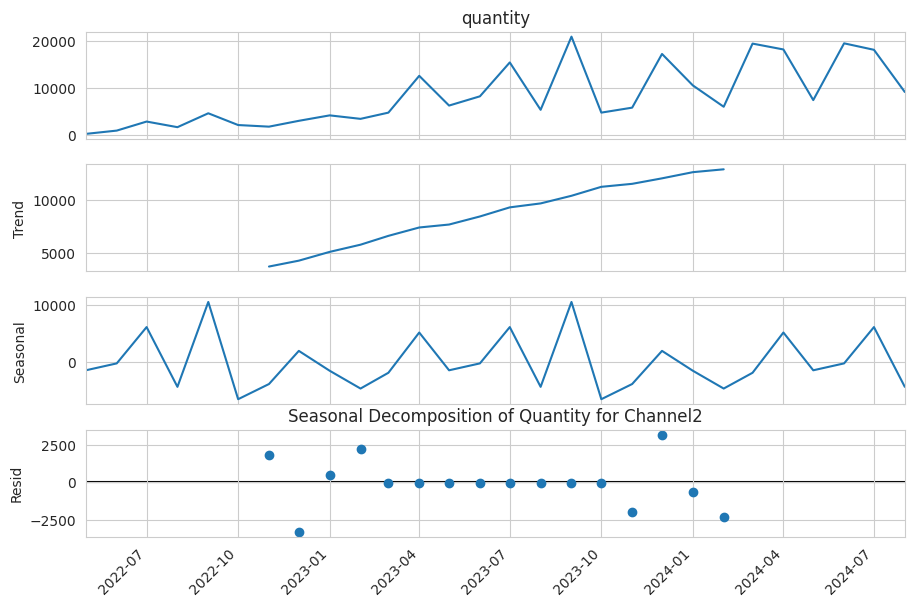

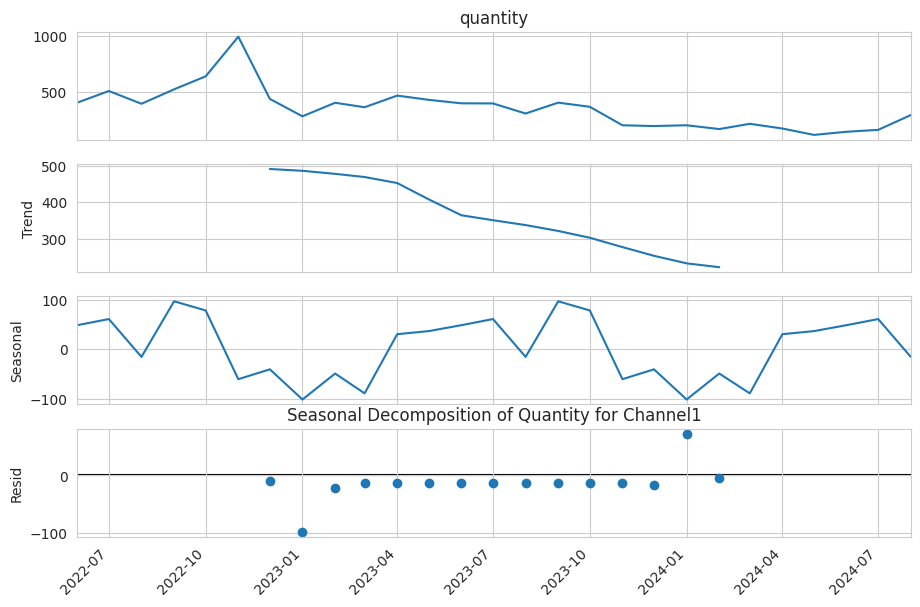

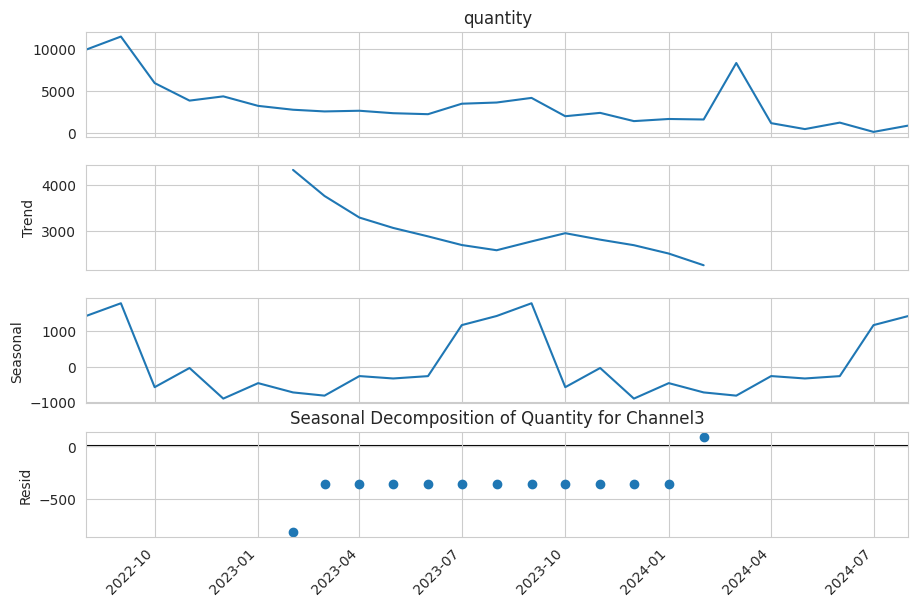

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Aggregate quantity by month_year and channel
channel_quantity_by_month = df.groupby(['month_year', 'channel'])['quantity'].sum().reset_index()

# Iterate through each channel and create a decomposition plot
for channel in channel_quantity_by_month['channel'].unique():
    # Filter data for the current channel
    channel_data = channel_quantity_by_month[channel_quantity_by_month['channel'] == channel].set_index('month_year')

    # Convert the index to DatetimeIndex before decomposition
    channel_data.index = channel_data.index.to_timestamp()

    # Perform seasonal decomposition
    decomposition = seasonal_decompose(channel_data['quantity'], model='additive', period=12)

    # Create the plot
    fig = decomposition.plot()
    fig.set_size_inches(10, 6)

    plt.xticks(rotation=45, ha='right')
    plt.title(f'Seasonal Decomposition of Quantity for {channel}') #Added title for clarity

    plt.show()
    print('\n')




1. **Channel 2:**
   - **Trend:** Increasing, indicating a steady rise in quantity over time.
   - **Seasonality:** Noticeable fluctuations, likely due to cyclical patterns in demand.
   - **Residuals:** Mostly close to zero, suggesting the model captures most variations.

2. **Channel 1:**
   - **Trend:** Declining, meaning the overall quantity has decreased over time.
   - **Seasonality:** Some regular fluctuations, but less pronounced.
   - **Residuals:** Small deviations, indicating good model fit.

3. **Channel 3:**
   - **Trend:** Declining, though there are minor recoveries.
   - **Seasonality:** Moderate variations.
   - **Residuals:** A few noticeable deviations but mostly stable.

### Key Takeaways:
- **Channel 2** shows a growing trend, making it a strong performer.
- **Channels 1 & 3** exhibit declining trends, warranting further investigation into causes.
- Seasonal patterns are present across all channels, influencing fluctuations.



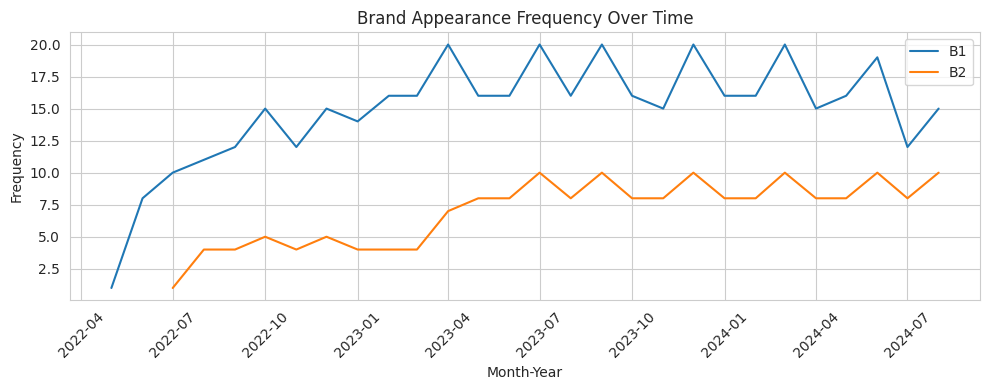

In [ ]:
import matplotlib.pyplot as plt

# Group data by month_year and brand, then count the occurrences
brand_counts = df.groupby(['month_year', 'brand']).size().reset_index(name='counts')

# Convert 'month_year' to timestamps instead of Period
brand_counts['month_year'] = brand_counts['month_year'].dt.to_timestamp()

# Create the line plot
plt.figure(figsize=(10, 4))
for brand in brand_counts['brand'].unique():
    brand_data = brand_counts[brand_counts['brand'] == brand]
    plt.plot(brand_data['month_year'], brand_data['counts'], label=brand)

plt.xlabel('Month-Year')
plt.ylabel('Frequency')
plt.title('Brand Appearance Frequency Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



*   Both brands show seasonal variations, with peaks occurring at regular intervals.

*   The recent decline in B1 could indicate market saturation or competition.

*   B2’s stability suggests a niche but steady demand.



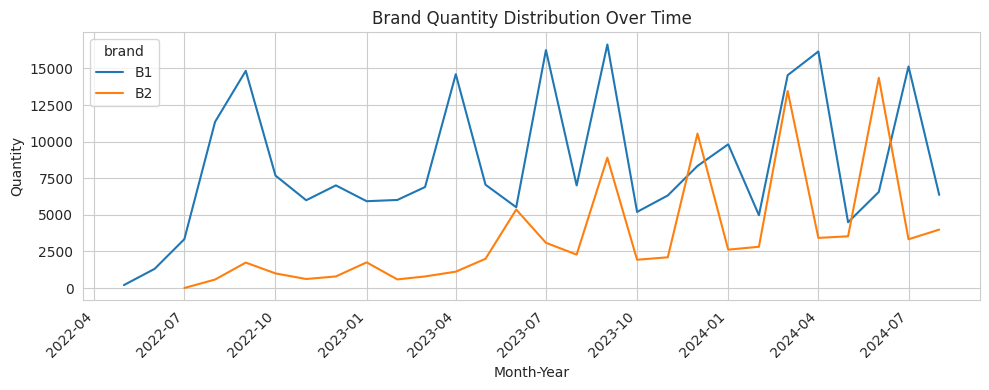

In [ ]:


# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by brand and month_year, then sum the quantity
brand_quantity_by_month = df.groupby(['brand', 'month_year'])['quantity'].sum().reset_index()


# Convert month_year to datetime objects for proper plotting
# Convert 'month_year' to timestamps instead of using pd.to_datetime directly
brand_quantity_by_month['month_year'] = brand_quantity_by_month['month_year'].dt.to_timestamp()


# Create the plot
plt.figure(figsize=(10, 4))  # Adjust figure size as needed
sns.lineplot(x='month_year', y='quantity', hue='brand', data=brand_quantity_by_month)
plt.title('Brand Quantity Distribution Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Quantity')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



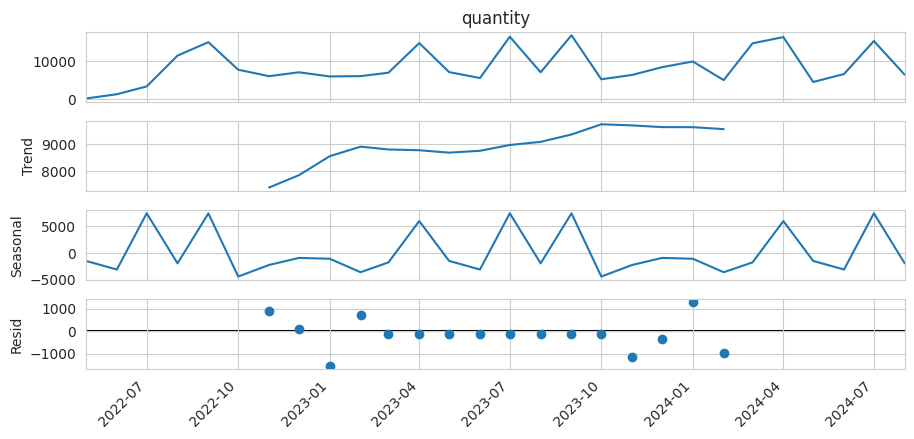

In [ ]:
# Check for seasonality using a decomposition plot (optional)
from statsmodels.tsa.seasonal import seasonal_decompose
# Example for Brand B1, adjust as needed
b1_data = brand_quantity_by_month[brand_quantity_by_month['brand'] == 'B1'].set_index('month_year')


decomposition = seasonal_decompose(b1_data['quantity'], model='additive', period=12) #period 12 for yearly data

# Increase plot size
fig = decomposition.plot()
fig.set_size_inches(10, 4)  # Adjust width and height as desired

# Rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

plt.show()

### Interpretation of the Time Series Decomposition:

1. **Observed Data (Top Panel - "quantity")**  
   - The quantity fluctuates over time but follows a repeating pattern, indicating some form of seasonality.  
   - Peaks and troughs appear at regular intervals, which suggests a cyclic or seasonal trend.  

2. **Trend Component (Second Panel)**  
   - The trend is generally increasing from mid-2022 to early 2024.  
   - However, there is a slight flattening in late 2023, which may indicate a slowdown in growth.  

3. **Seasonal Component (Third Panel)**  
   - There is a clear repetitive pattern in the seasonal component, with ups and downs occurring at regular intervals.  
   - This suggests a strong seasonal effect where quantity increases and decreases cyclically.  

4. **Residual Component (Bottom Panel - "Resid")**  
   - The residuals are mostly close to zero, with some positive and negative spikes.  
   - There are a few noticeable outliers, meaning that at certain times, unexpected variations occurred that were not captured by the trend or seasonality.  

### Key Insights:
- **General Growth:** The quantity is increasing over time, as seen in the trend.  
- **Seasonal Patterns:** The data follows a repeating seasonal pattern, indicating predictable fluctuations.  
- **Potential Anomalies:** Some unexpected variations exist (outliers in the residual plot), which might be due to external factors (e.g., sudden demand spikes, market changes).  


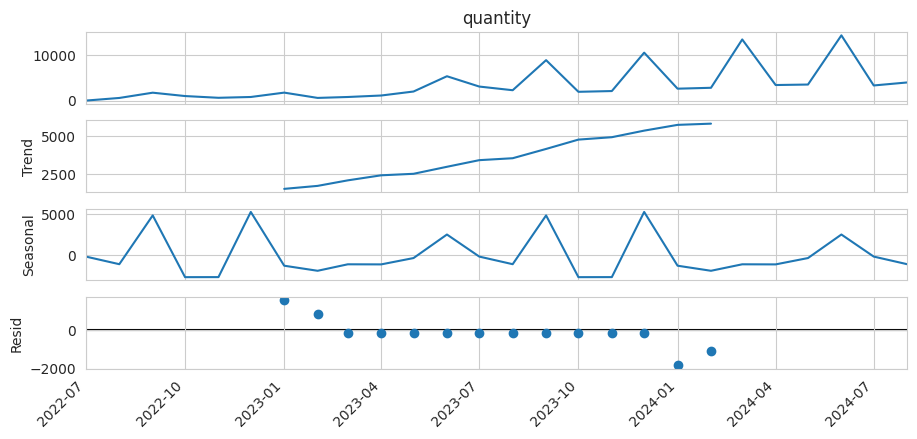

In [ ]:
# Check for seasonality using a decomposition plot (optional)
from statsmodels.tsa.seasonal import seasonal_decompose
# Example for Brand B1, adjust as needed
b1_data = brand_quantity_by_month[brand_quantity_by_month['brand'] == 'B2'].set_index('month_year')


decomposition = seasonal_decompose(b1_data['quantity'], model='additive', period=12) #period 12 for yearly data

# Increase plot size
fig = decomposition.plot()
fig.set_size_inches(10, 4)  # Adjust width and height as desired

# Rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

plt.show()

Observations from the Graph
Original Data (First Plot - "quantity")

The data shows a clear upward trend over time, indicating an increasing quantity.
There are repetitive peaks and troughs, suggesting seasonality.
Trend Component (Second Plot)

The trend component is increasing steadily, which means the overall quantity is growing over time.
This could indicate a growing business, increasing demand, or external factors driving more sales.
Seasonal Component (Third Plot)

The seasonal pattern shows periodic fluctuations (likely yearly or monthly).
This suggests that certain periods experience higher quantities, possibly due to seasonal demand or promotions.
Residual Component (Fourth Plot)

The residuals capture the remaining variation after removing trend and seasonality.
There are some points with large deviations, indicating potential anomalies or external events affecting quantity.





# Anomaly detection

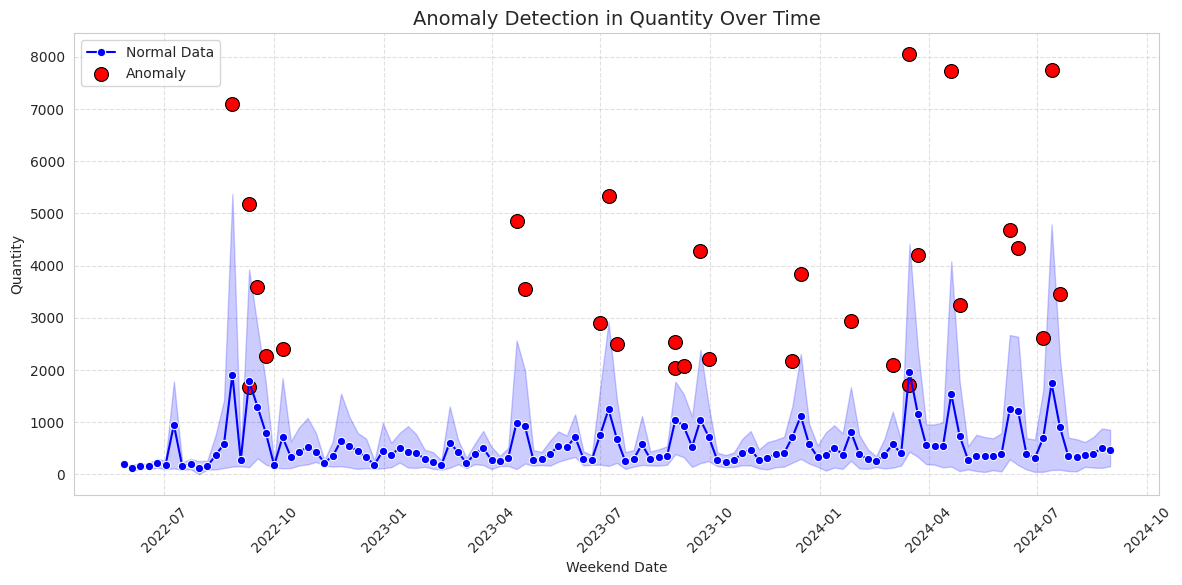

In [ ]:
from sklearn.ensemble import IsolationForest
# Select relevant columns
# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination if needed
df['anomaly'] = iso_forest.fit_predict(df[['quantity']])

# Mark anomalies
df['is_anomaly'] = df['anomaly'] == -1  # True if anomaly, False otherwise

# Sorting data by date for a smooth line plot
df = df.sort_values('weekend_date')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(x=df['weekend_date'], y=df['quantity'], color='blue', marker="o", label="Normal Data")
sns.scatterplot(x=df[df['is_anomaly']]['weekend_date'],
                y=df[df['is_anomaly']]['quantity'],
                color='red', s=100, label="Anomaly", edgecolor='black')

# Customize Plot
plt.xlabel("Weekend Date")
plt.ylabel("Quantity")
plt.title("Anomaly Detection in Quantity Over Time", fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

### Feature Engineering Ideas  
1. **Time-Based Features** – Add weekday/weekend, month, season, rolling averages, and lag features (previous week/month sales).  
2. **Statistical Features** – Compute Z-score, deviation from mean, cumulative sales, and moving averages.  
3. **Brand & Channel Frequency** – Track brand frequency, brand-channel interactions, and category popularity.  
4. **Outlier-Specific Features** – Add an anomaly flag (0/1) and deviation from historical median.  
5. **External Factors** – Include campaign weeks and competitor pricing (if available).  


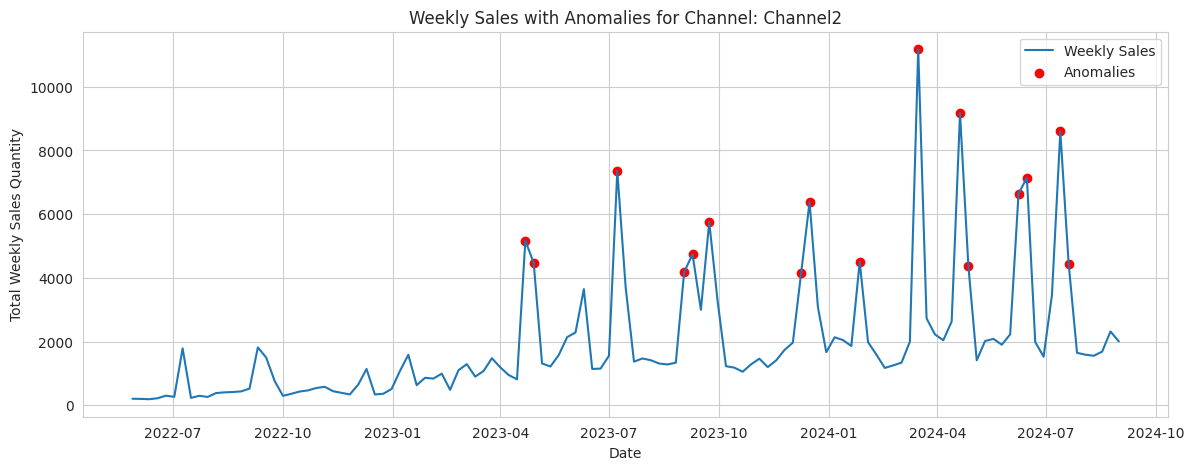

Potential Anomalies for Channel Channel2:


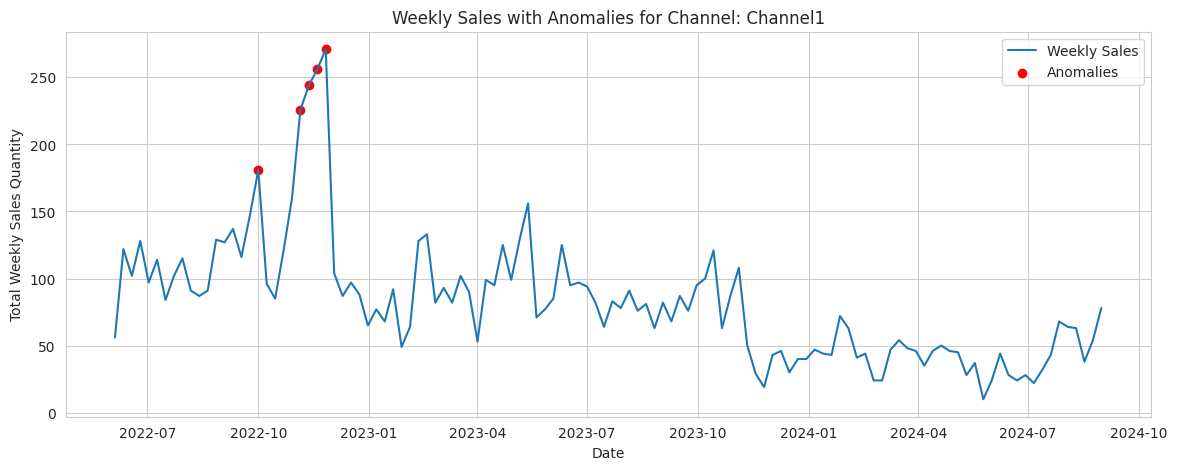

Potential Anomalies for Channel Channel1:


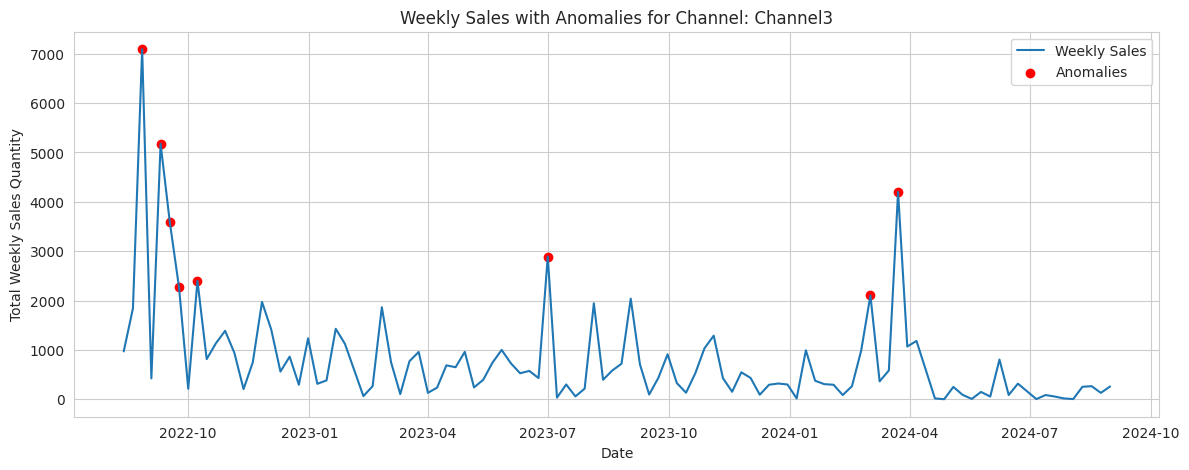

Potential Anomalies for Channel Channel3:


,weekend_date,quantity
2,2022-08-27,7090
4,2022-09-10,5177
5,2022-09-17,3588
6,2022-09-24,2266
8,2022-10-08,2398
46,2023-07-01,2892
81,2024-03-02,2105
84,2024-03-23,4201


In [ ]:
# Anomaly detection and seasonality analysis per channel
for channel in df['channel'].unique():
    channel_data = df[df['channel'] == channel]

    # Time series decomposition
    channel_sales = channel_data.groupby('weekend_date')['quantity'].sum().reset_index()
    # decomposition = seasonal_decompose(channel_sales['quantity'], model='additive', period=4) # Assuming a 4-week seasonality (adjust if needed)

    # # Plot decomposition components
    # plt.figure(figsize=(14, 5))
    # decomposition.plot()
    # plt.suptitle(f'Time Series Decomposition for Channel: {channel}', fontsize=16)
    # plt.show()

    # Anomaly detection (using IQR for demonstration)
    Q1 = channel_sales['quantity'].quantile(0.25)
    Q3 = channel_sales['quantity'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    anomalies = channel_sales[(channel_sales['quantity'] < lower_bound) | (channel_sales['quantity'] > upper_bound)]

    # Plot anomalies
    plt.figure(figsize=(14, 5))
    plt.plot(channel_sales['weekend_date'], channel_sales['quantity'], label='Weekly Sales')
    plt.scatter(anomalies['weekend_date'], anomalies['quantity'], color='red', label='Anomalies')
    plt.xlabel('Date')
    plt.ylabel('Total Weekly Sales Quantity')
    plt.title(f'Weekly Sales with Anomalies for Channel: {channel}')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Potential Anomalies for Channel {channel}:")
anomalies


In [ ]:
# @title Peak quantity analysis

# Filter data for the peak months
peak_months_df = df[(df['month_year'] >= '2024-03') & (df['month_year'] <= '2024-04')]

# Group by relevant features to see potential reasons for the peak
peak_analysis = peak_months_df.groupby(['channel', 'brand', 'category', 'sub_category']).agg({'quantity': 'sum'})

# Sort the results by quantity to see the most significant contributors
peak_analysis = peak_analysis.sort_values('quantity', ascending=False)

# Print or display the results.  You may also want to visualize this as a bar chart
peak_analysis





quantity
channel  brand category sub_category           
Channel2 B1    Face     Face Serum        18225
         B2    Face     Face Cleanser     16888
Channel3 B1    Face     Face Serum         9531
Channel2 B1    Cat1     Sub-Cat1           2551
Channel1 B1    Body     Body Lotion         396

# Conclusion:

 The analysis reveals distinct trends and seasonality in sales data across different channels and brands. Channel 2 demonstrates a positive growth trend, while Channels 1 and 3 show declining trends, necessitating further investigation into the underlying causes.  Seasonality is evident in all channels, with regular fluctuations influencing sales volumes. Brand B1 displays a recent decline, while Brand B2 exhibits stable demand.  Anomaly detection identified potential outliers in sales quantities, suggesting external factors or unusual events impacting sales patterns.  Peak sales periods in March and April show specific channel, brand, category, and sub-category combinations driving the increased sales volume.

 Feature Engineering Recommendations:

 1. Time-based Features:
     - Create features for day of the week (weekday/weekend), month, and season to capture temporal patterns.
     - Implement rolling averages (e.g., 7-day, 30-day) of sales quantities to smooth out short-term fluctuations and capture trends.
     - Generate lag features representing sales from previous weeks or months to reflect historical sales patterns.  These lags can be 1, 2, 3, and even 12 months to capture different seasonal effects.
     - Public holidays, if available, as a categorical feature.

 2. Channel and Brand Interaction Features:
     - Calculate the frequency of each brand within each channel.
     - Create interaction terms (e.g., channel * brand) to model potential synergies between specific channel-brand combinations.
     - Incorporate category and sub-category popularity (frequency or total sales) within each channel.

 3. Statistical Features:
     - Compute the Z-score for sales quantities to identify significant deviations from the mean.
     - Calculate the deviation of sales from the historical median or mean for each channel/brand.
     - Create cumulative sales features to track overall performance.
     - Generate moving averages to smooth sales data and highlight trends.

 4. Outlier Handling:
     - Create a binary feature ('is_anomaly') to flag detected outliers.
     - Calculate the deviation of sales quantities from the historical median or mean for each channel/brand and consider using these deviations as features.

 5. External Factors (If Available):
     - If data on marketing campaigns, competitor pricing, economic indicators, or promotional events are accessible, include them as features.  This information can help explain unusual spikes or dips in sales quantities.

 6. Encoding Categorical Features:
    - Use one-hot encoding or target encoding for categorical variables like 'channel', 'brand', 'category', and 'sub_category' before applying any model.  This is important as many models can't work directly with text features.
